In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("owid-covid-data.csv")

In [4]:
df["dated"] = pd.to_datetime(df["date"])
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,dated
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-24
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-25
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-26
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-27
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,2020-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182691,ZWE,Africa,Zimbabwe,2022-04-26,247667.0,69.0,52.857,5469.0,1.0,0.714,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-04-26
182692,ZWE,Africa,Zimbabwe,2022-04-27,247729.0,62.0,56.143,5469.0,0.0,0.429,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-04-27
182693,ZWE,Africa,Zimbabwe,2022-04-28,247784.0,55.0,57.286,5469.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-04-28
182694,ZWE,Africa,Zimbabwe,2022-04-29,247842.0,58.0,50.571,5469.0,0.0,0.143,...,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN,2022-04-29


In [5]:
#Exemple de fonction
#def dessiner_chart(z):
#    continent[z].value_counts(normalize=True).plot(kind='pie')
#dessiner_chart('Birth')

fonction qui prend en param un pays et renvoie les données(tableau) le concernant

In [6]:
def filtrer_pays(x):
    filtre_pays = df["location"] == x
    df_filtre = df[filtre_pays]
    return (df_filtre)
filtrer_pays('France')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,dated
57912,FRA,Europe,France,2020-01-24,2.0,2.0,NaN,NaN,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2020-01-24
57913,FRA,Europe,France,2020-01-25,3.0,1.0,NaN,NaN,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2020-01-25
57914,FRA,Europe,France,2020-01-26,3.0,0.0,NaN,NaN,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,-3599.6,-6.61,-7.74,-53.389101,2020-01-26
57915,FRA,Europe,France,2020-01-27,3.0,0.0,NaN,NaN,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2020-01-27
57916,FRA,Europe,France,2020-01-28,4.0,1.0,NaN,NaN,NaN,NaN,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2020-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58734,FRA,Europe,France,2022-04-25,28371750.0,14032.0,75304.143,145326.0,197.0,150.286,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2022-04-25
58735,FRA,Europe,France,2022-04-26,28469248.0,97498.0,85594.571,145496.0,170.0,148.571,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2022-04-26
58736,FRA,Europe,France,2022-04-27,28536959.0,67711.0,73023.143,145648.0,152.0,137.857,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2022-04-27
58737,FRA,Europe,France,2022-04-28,28596966.0,60007.0,66737.429,145780.0,132.0,130.286,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2022-04-28


prend en param un pays et renvoi la ligne contenant l'information la plus récente du pays( qui est max[date] )  

In [7]:
def get_date_max(y):
    x = filtrer_pays(y)
    derniere_date = x[x['dated']>= x['dated'].max()]
    return(derniere_date)
get_date_max('France')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,dated
58738,FRA,Europe,France,2022-04-29,28649885.0,52919.0,61670.286,145938.0,158.0,132.0,...,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN,2022-04-29


fonction qui prend en param un pays et une colonne(ex: nombre de cas, nombre de morts, guerris....) et renvoi un graphe decrivant l'évolution de cette donnée dans ce pays

<AxesSubplot:xlabel='dated'>

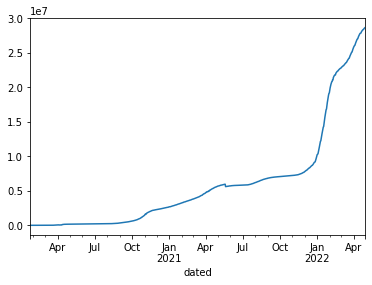

In [8]:
def dessiner_graphe(pays,info,nom_fichier):
    x = filtrer_pays(pays)
    fig = x.groupby(x["dated"].dt.floor("24H")).sum()[info].plot()
    fig.figure.savefig(nom_fichier)
    return (fig)
dessiner_graphe('France', 'total_cases','avancée_france.png')

<AxesSubplot:xlabel='dated'>

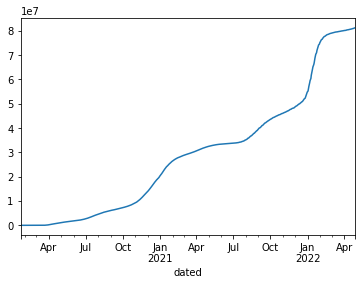

In [9]:
dessiner_graphe('United States', 'total_cases','avancée_States.png')

2.5 * 1e7 = 2.5 * 10^7 ~= +25 million ce qu'on voit bien à la dernière case ci-dessus. 

dt.flour(24H) met dans le graphe la nouvelle valeur chaque 24 heure ou D pour day

<AxesSubplot:xlabel='dated'>

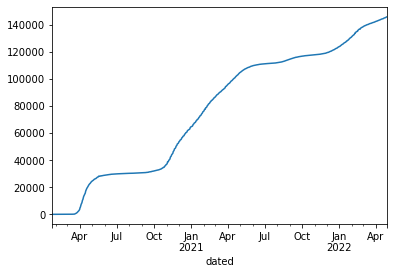

In [10]:
dessiner_graphe('France', 'total_deaths','avancée_décès_france.png')

In [11]:
get_date_max('United States')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,dated
172937,USA,North America,United States,2022-04-29,81325716.0,74085.0,53449.714,993588.0,424.0,335.286,...,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN,2022-04-29


<AxesSubplot:xlabel='dated'>

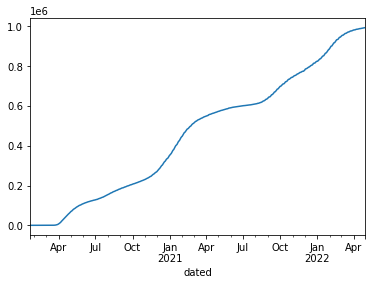

In [12]:
dessiner_graphe('United States', 'total_deaths','avancée_décès_States.png')

In [13]:
df_plot = pd.read_csv('covid_pays_v2.csv')
df_plot['continent'].isnull().values.any()

True

In [14]:
df_plot['continent'].isnull().sum() ## nombre de lignes contenant NAN dans la colonne continent

13

In [15]:
df_rectifier = df_plot.dropna(subset=['continent']) ## drop ses ligne avec NAN
df_rectifier['continent'].isnull().values.any()

False

In [16]:
df_rectifier

,iso_code,continent,location,date,total_cases,total_deaths,population
0,AFG,Asia,Afghanistan,4/29/2022,178873,7683.0,39835428.0
2,ALB,Europe,Albania,4/29/2022,275055,3496.0,2872934.0
3,DZA,Africa,Algeria,4/29/2022,265779,6875.0,44616626.0
4,AND,Europe,Andorra,4/29/2022,41349,153.0,77354.0
5,AGO,Africa,Angola,4/29/2022,99287,1900.0,33933611.0
...,...,...,...,...,...,...,...
222,VNM,Asia,Vietnam,4/29/2022,10644700,43038.0,98168829.0
223,WLF,Oceania,Wallis and Futuna,4/29/2022,454,7.0,11094.0
225,YEM,Asia,Yemen,4/29/2022,11818,2149.0,30490639.0
226,ZMB,Africa,Zambia,4/29/2022,319594,3976.0,18920657.0


In [17]:
multi_index = df_rectifier.set_index(['continent' , 'location'])

In [18]:
country_sum = multi_index.groupby(['location']).agg({'total_cases':['sum'], 'total_deaths':['sum'] })
##country_sum

In [19]:
country_sum.columns = ['nb_cas_total' , 'nb_total_morts']
##country_sum

In [20]:
## tri par nombre de cas
sorted_df_cases = country_sum.sort_values(['nb_cas_total'], ascending=False)
## tri par nombre de décès
sorted_df_deaths = country_sum.sort_values(['nb_total_morts'], ascending=False)
sorted_df_cases.head(10)

,nb_cas_total,nb_total_morts
location,,
United States,81325716,993588.0
India,43075864,523803.0
Brazil,30433042,663649.0
France,28649885,145938.0
Germany,24798067,135451.0
United Kingdom,22112691,175081.0
Russia,17909924,368166.0
South Korea,17237878,22794.0
Italy,16409183,163377.0


In [21]:
sorted_df_deaths.head(10)

,nb_cas_total,nb_total_morts
location,,
United States,81325716,993588.0
Brazil,30433042,663649.0
India,43075864,523803.0
Russia,17909924,368166.0
Mexico,5738769,324294.0
Peru,3564558,212810.0
United Kingdom,22112691,175081.0
Italy,16409183,163377.0
Indonesia,6046467,156240.0


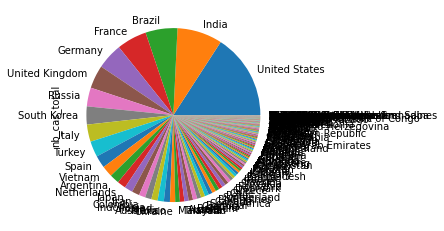

In [22]:
fig_case =sorted_df_cases['nb_cas_total'].plot(kind='pie')
fig_case.figure.savefig('case_pie_chart.png')

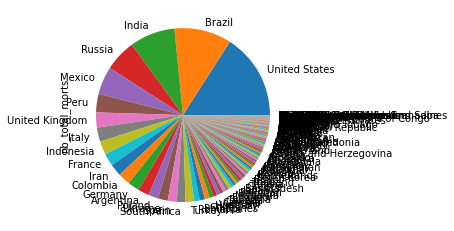

In [23]:
fig_deaths = sorted_df_deaths['nb_total_morts'].plot(kind='pie')
fig_deaths.figure.savefig('deaths_pie_chart.png')